**Aim: Implement Decsion Tree classifier**


- Implement Decision Tree classifier using scikit learn library
- Test the classifier for Weather dataset

    Step 1: Import necessary libraries.

In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

    Step 2: Prepare dataset.

In [2]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

    Step 3: Digitize the data set using encoding

In [3]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


    Step 4: Merge different features to prepare dataset

In [4]:

features = tuple(zip(Outlook_encoded, Temperature_encoded, Humidity_encoded, Wind_encoded))
features

((1, 1, 0, 0),
 (1, 1, 0, 1),
 (0, 1, 0, 0),
 (2, 2, 0, 0),
 (2, 0, 1, 0),
 (2, 0, 1, 1),
 (0, 0, 1, 1),
 (1, 2, 0, 0),
 (1, 0, 1, 0),
 (2, 2, 1, 0),
 (1, 2, 1, 1),
 (0, 2, 0, 1),
 (0, 1, 1, 0),
 (2, 2, 0, 1))

    Step 5: Train ’Create and Train DecisionTreeClassifier’

In [5]:
#Create a Decision Tree Classifier (using Entropy)
DT = DecisionTreeClassifier(criterion = "entropy")

# Train the model using the training sets
final_model = DT.fit(features, Play_encoded) #(features, Class_label)

    Step 6: Predict Output for new data

In [6]:
#Predict Output
prediction = DT.predict([[0, 1, 1, 0],[2, 2, 1, 1], [2, 2, 0, 1]]) # last is from training dataset and expected o/p was 0 and it is
print("Predicted Values for Playing: ", prediction) #No:0 ; Yes:1


Predicted Values for Playing:  [1 1 0]


    Step 7: Display Decsion Tree Created
     
     - This step requires graphviz and tkinter packages installed 

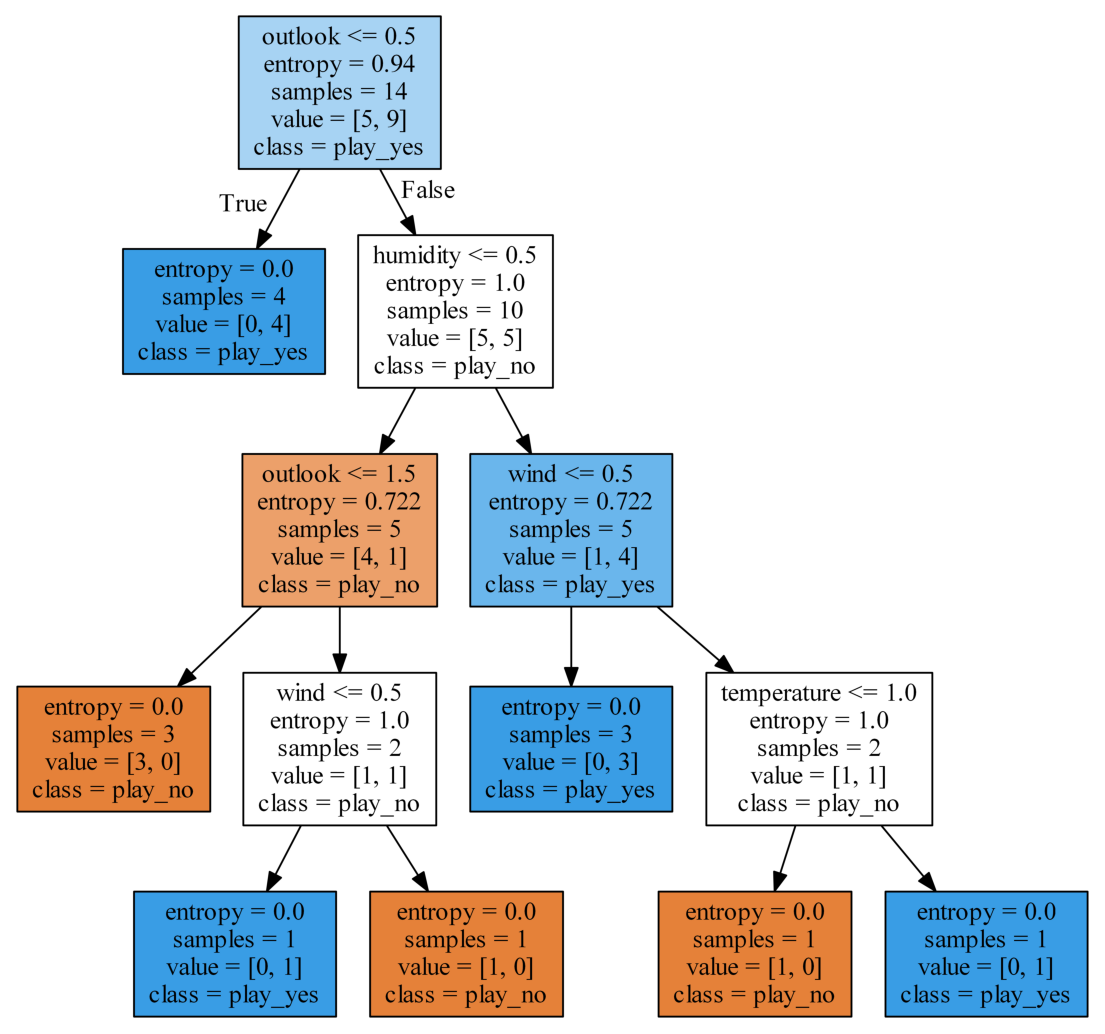

In [7]:

from sklearn.tree import export_graphviz
export_graphviz(DT,out_file='tree_entropy.dot',
               feature_names=['outlook','temperature','humidity','wind'],
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'], shell=True)

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off')
plt.show()

In [8]:
from sklearn.tree import plot_tree
print(plot_tree(DT,  class_names = ["Yes", "No"]))

[Text(165.33333333333334, 332.64, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = No'), Text(110.22222222222223, 258.71999999999997, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No'), Text(220.44444444444446, 258.71999999999997, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = Yes'), Text(110.22222222222223, 184.8, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Yes'), Text(55.111111111111114, 110.88, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Yes'), Text(165.33333333333334, 110.88, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Yes'), Text(110.22222222222223, 36.960000000000036, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'), Text(220.44444444444446, 36.960000000000036, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'), Text(330.6666666666667, 184.8, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = No'), Text(275.55555555555554, 110.88, 'entropy = 0.0\n